https://netology.ru/profile/program/pyda-18/lessons/59745/lesson_items/284315

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


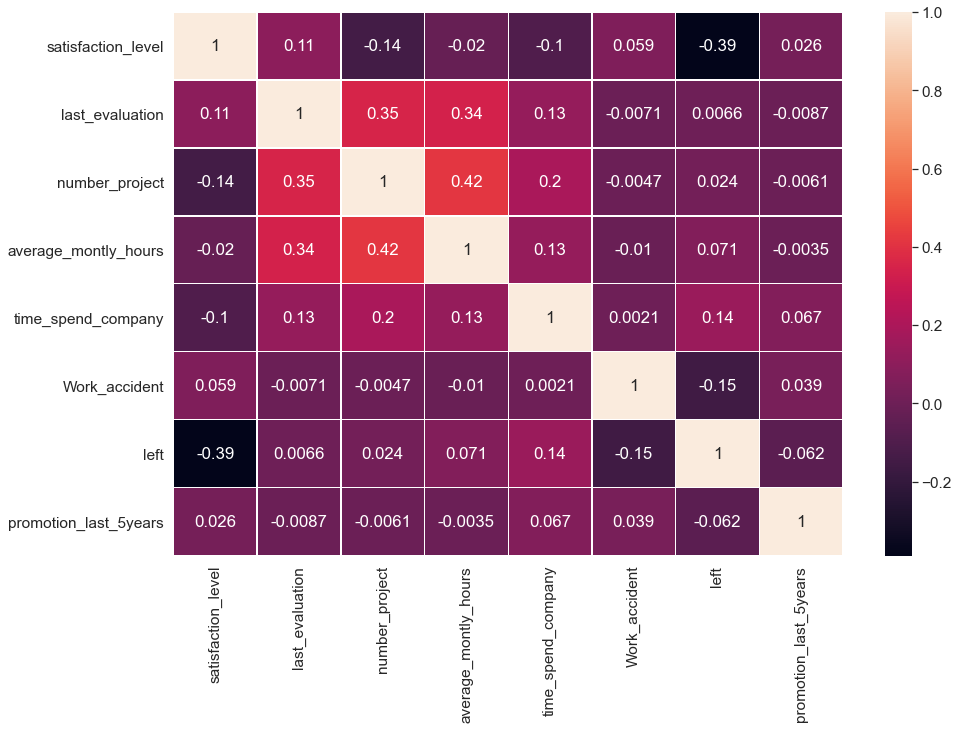

In [9]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(15,10))
hm = sns.heatmap(df.corr(),
                linewidths=.5,
                annot=True,)

In [7]:
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

In [8]:
df.groupby('salary')['salary'].count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

In [9]:
df.groupby(['department','salary'])['department'].count()

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: department, dtype: int64

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

In [170]:
df_prom = df[df.promotion_last_5years == 1]
prom = df_prom.groupby(["left"])\
.agg({"promotion_last_5years" : "count"})[["promotion_last_5years"]]\
.apply(lambda x: 100*x/x.sum()).reset_index()

In [171]:
df.groupby('left')['satisfaction_level','number_project'].mean().merge(prom, left_on='left',
                                                                       right_on='left', how='inner')

<ipython-input-171-e52e48570a11>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('left')['satisfaction_level','number_project'].mean().merge(prom, left_on='left',


,left,satisfaction_level,number_project,promotion_last_5years
0,0,0.666810,3.786664,94.043887
1,1,0.440098,3.855503,5.956113


In [3]:
df_lda = df[['satisfaction_level', 'last_evaluation',\
   'number_project','average_montly_hours',\
   'time_spend_company','Work_accident',\
   'left','promotion_last_5years']]

In [4]:
df_lda.astype('float64')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,1.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,1.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,1.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,1.0,0.0


In [5]:
left_target = df_lda.left

In [6]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_lda, left_target, test_size=0.25)

In [7]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [8]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [9]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [11]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 6169 to 11844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   left       3750 non-null   float64
 1   Unnamed 0  964 non-null    float64
dtypes: float64(2)
memory usage: 216.9 KB


In [12]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test, lda.predict(X_test))

0.7573333333333333